# Customer Churn
***
## Introduction
Customer churn is a busines term to describe the act of a customer unsubscribing, leaving, or otherwise ceasing to use your service. Custoemr churn rate can be calculate as the number of customers you lost during a certain window of time divided by the number of customers you started off with before that time window (multiplied by 100 to get a percentage).

For example, let's say at the start of a quarter (3-month period) you had 1000 customers, and after the quarter you have 900 customers. Thus you're churn rate is 

$$\begin{equation}
    C_R = \frac{1000-900}{1000} * 100 = 10% 
\end{equation}$$

Why is customer churn rate so important? An obvious point to observe is that any business does not want to regularly lose customers. However, digging a little deeper you might accept a churn rate of 5% per month if the number of new customers is 10%, meaning overall your customer base is growing by 5%. However, studies have shown that gaining new customers is anywhere between 5 - 25x more expensive than retaining existing customers [[1]](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers). If the above case, even though your customer base is growing by 5% you are actually spending more money than if you were able to decrease churn rate to 0% and only recruit 5% new customers per quarter. Same growth rate but different net profit for the company.

#### Strategising

Being able to predict which customers are likely to churn is a key to designing marketing strategies for companies large and small. If you can categorise customers on the likelihood of them churning - say very likely, not likely, impossible - then you can target the high risk customers with timely offers to make them stay. 

#### Traditional Approach to Strategy
For example, most of us have gone through the process of changing our internet or phone provider at some point or another. When you speak to the first person and tell them you would like to cancel you're subscription you are now immediately an at risk customer. This first employee of said company will usually ask why you would like to stop you're service. If you are moving they will simply offer to retain you by providing internet to your new house. Thats an easy retention scheme because it costs the company no money and keeps you with them. If you're moving to a new provider because you found a better deal then you are now classes at very risky and so you might get a new offers from the company which is better than your existing package to try to convince you to stay. This costs the company some of their profit margin, but they still keep you. If you are still intent on leaving you will usually get passed to a special team which is specifically in charge of dealing with customers at the end of the line. This is where all the action happens. You are now classed at the highest level of risk and this team has the ability to offer you the best deals available in a last ditch attempt to keep you. These offers cost the company the most of their profit margin and this is why they are reserved for the most at risk customers. 

You can see how the internet companies design their offers around your level of risk thereby striking a balance between keeping customers whilst keeping them at the highest price plan that the customers will willingly stay for.

#### Data  Approach to Strategy
The above example is a very traditional approach to customer churn and has been done for years. More recently, companies have leveraged the huge amount of historic data they have on customers to build profiles and try to predict before you even call if you are likely to churn. This is a good strategy from the companies perspective as by the time you make the call to the company you are clearly quite intent on leaving. 

The models that are built from the historic data will highlight customers that are likely to churn based on various things, e.g. for a cell phone provider maybe the number of texts you said, total length of calls in a month, internet usage, etc etc. If the model highlights you as risky you will get a seemingly unexpected call from the blue from your provider offering you an early upgrade or some new better deal. You are pleasantly surprised and take the offer and tell your friends how great company X is because they gave you a better deal without you even having to ask. You, happy with your new offer never look to other provders, and company X has secured a customer for another 2 year contract without having to spend millions on marketing campaigns targeting new customers. Behind the scenes the company is trying to cut you off early before you even start looking into other deals at other providers as at this point it is already very hard to keep you without having to offer you their least profitable deal.


From these examples, the power that lies in accurate customer churn prediction is clear so let's try to do it for a dataset

***
## Data
The data is taken from [KDD Cup 2009: Customer relationship prediction](https://www.kdd.org/kdd-cup/view/kdd-cup-2009/Data)

From the website,

"*The KDD Cup 2009 offers the opportunity to work on large marketing databases from the French Telecom company Orange to predict the propensity of customers to switch provider (churn), buy new products or services (appetency), or buy upgrades or add-ons proposed to them to make the sale more profitable (up-selling)."*

and

"*Both training and test sets contain 50,000 examples. The data are split similarly for the small and large versions, but the samples are ordered differently within the training and within the test sets. Both small and large datasets have numerical and categorical variables. For the large dataset, the first 14,740 variables are numerical and the last 260 are categorical. For the small dataset, the **first 190 variables are numerical** and the **last 40 are categorical**."*

I have taken the small dataset which consists of 230 independent variables. Furthermore, I have download only the data for customers who churn so I will not be trying to predict appetency or up-selling labels.

### Format

The datasets use a format similar as that of the text export format from relational databases:

1. One header lines with the variables names
2. One line per instance
3. Separator tabulation between the values
4. There are missing values (consecutive tabulations)

The target values (.labels files) have one example per line in the same order as the corresponding .data files. Note that churn, appetency, and up-selling are three separate binary classification problems. The target values are +1 or -1. We refer to examples having +1 (resp. -1) target values as positive (resp. negative) examples.

In [486]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

First let's load the data, make a list of numerical and categorical columns, and also a new dataframe containing the independent variables joined with the target variable

In [487]:
df_train_variables = pd.read_csv("../data/orange_small_train.data", delimiter="\t")
#df_test_variables = pd.read_csv("../data/orange_small_test.data", delimiter="\t")
df_train_target = pd.read_csv("../data/orange_small_train_churn.labels", delimiter="\t", 
                              header=None)
df_train_target.columns = ['target']

In [488]:
print("Length of training data is {}".format(len(df_train_variables)))
#print("Length of target data is {}".format(len(df_train_target)))
print("Length of testing data is {}".format(len(df_test_variables)))


Length of training data is 50000
Length of testing data is 50000


In [489]:
df_train_target.head()

,target
0,-1
1,1
2,-1
3,-1
4,-1


In [490]:
df_train_variables.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,...,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,...,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,...,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1029.0,7.0,NaN,NaN,NaN,...,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN


In [491]:
numerical_cols = df_train_variables.columns[:190]
categorical_cols = df_train_variables.columns[-40:]
print(numerical_cols)
print(categorical_cols)

Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'Var9',
       'Var10',
       ...
       'Var181', 'Var182', 'Var183', 'Var184', 'Var185', 'Var186', 'Var187',
       'Var188', 'Var189', 'Var190'],
      dtype='object', length=190)
Index(['Var191', 'Var192', 'Var193', 'Var194', 'Var195', 'Var196', 'Var197',
       'Var198', 'Var199', 'Var200', 'Var201', 'Var202', 'Var203', 'Var204',
       'Var205', 'Var206', 'Var207', 'Var208', 'Var209', 'Var210', 'Var211',
       'Var212', 'Var213', 'Var214', 'Var215', 'Var216', 'Var217', 'Var218',
       'Var219', 'Var220', 'Var221', 'Var222', 'Var223', 'Var224', 'Var225',
       'Var226', 'Var227', 'Var228', 'Var229', 'Var230'],
      dtype='object')


In [492]:
#bDataframes will automatically align based on index thanks to numpy running under the hood
df_complete = pd.concat([df_train_variables, df_train_target], axis=1, sort=False)
df_complete.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,target
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,...,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN,-1
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,...,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN,1
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,...,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN,-1
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN,-1
4,NaN,NaN,NaN,NaN,NaN,1029.0,7.0,NaN,NaN,NaN,...,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN,-1


***
## EDA

There is a few things I need to do here.
1. Deal with missing values
2. Feature selection
3. Feature engineering

### Missing values
First let's look at the dataset and how many missing values it has. 

First thing to do notice is that there is quite a few columns that do not have any data whatsoever so let's just drop these.

In [493]:
df_complete.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Var1,702.0,11.487179,40.709951,0.0,0.00,0.00,16.00,680.0
Var2,1241.0,0.004029,0.141933,0.0,0.00,0.00,0.00,5.0
Var3,1240.0,425.298387,4270.193518,0.0,0.00,0.00,0.00,130668.0
Var4,1579.0,0.125396,1.275481,0.0,0.00,0.00,0.00,27.0
Var5,1487.0,238793.328850,644125.905205,0.0,0.00,0.00,118742.50,6048550.0
...,...,...,...,...,...,...,...,...
Var189,21022.0,270.142137,86.707692,6.0,204.00,270.00,330.00,642.0
Var190,333.0,22007.045192,29085.146490,0.0,2732.67,12668.94,29396.34,230427.0
Var209,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Var230,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [494]:
df_cleaned = df_complete.dropna(axis=1, how='all')
df_cleaned.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,target
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,...,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,-1
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,...,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,1
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,...,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,-1
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,-1
4,NaN,NaN,NaN,NaN,NaN,1029.0,7.0,NaN,NaN,NaN,...,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,-1


In [495]:
# Update the list of numerical and categorical columns
numerical_cols = df_cleaned.columns & numerical_cols
categorical_cols = df_cleaned.columns & categorical_cols

print(numerical_cols)
print(categorical_cols)

Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var9', 'Var10',
       'Var11',
       ...
       'Var180', 'Var181', 'Var182', 'Var183', 'Var184', 'Var186', 'Var187',
       'Var188', 'Var189', 'Var190'],
      dtype='object', length=174)
Index(['Var191', 'Var192', 'Var193', 'Var194', 'Var195', 'Var196', 'Var197',
       'Var198', 'Var199', 'Var200', 'Var201', 'Var202', 'Var203', 'Var204',
       'Var205', 'Var206', 'Var207', 'Var208', 'Var210', 'Var211', 'Var212',
       'Var213', 'Var214', 'Var215', 'Var216', 'Var217', 'Var218', 'Var219',
       'Var220', 'Var221', 'Var222', 'Var223', 'Var224', 'Var225', 'Var226',
       'Var227', 'Var228', 'Var229'],
      dtype='object')


What this graph shows is that a huge proportion of the independent variables are missing more than 90% of their entries. Using variables with this much missing data is inevitably going to add a lot of noise so I am going to drop any column that has < 20,000 entries

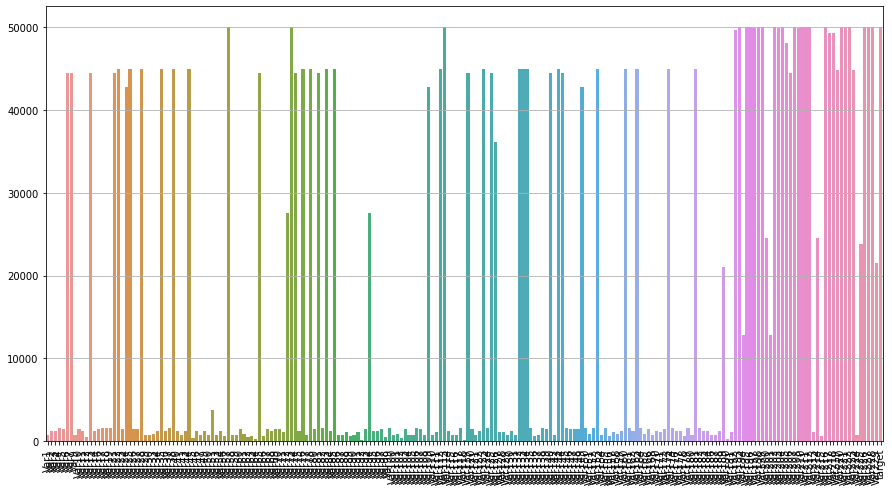

In [496]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
plt.grid()
sns.barplot(x=df_cleaned.columns, y= df_cleaned.count())

In [497]:
df_cleaned = df_cleaned[df_cleaned.columns[df_cleaned.count() > 20000]]
df_cleaned.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var220,Var221,Var222,Var223,Var225,Var226,Var227,Var228,Var229,target
0,1526.0,7.0,184.0,464.0,580.0,14.0,128.0,166.56,0.0,3570.0,...,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,-1
1,525.0,0.0,0.0,168.0,210.0,2.0,24.0,353.52,0.0,4764966.0,...,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,1
2,5236.0,7.0,904.0,1212.0,1515.0,26.0,816.0,220.08,0.0,5883894.0,...,JFM1BiF,Al6ZaUT,NKv4yOc,jySVZNlOJy,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,-1
3,NaN,0.0,0.0,NaN,0.0,NaN,0.0,22.08,0.0,0.0,...,L91KIiz,oslk,CE7uk3u,LM8l689qOp,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,-1
4,1029.0,7.0,3216.0,64.0,80.0,4.0,64.0,200.00,0.0,0.0,...,OrnLfvc,oslk,1J2cvxe,LM8l689qOp,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,-1


In [498]:
# Update numerical and categorical columns
numerical_cols = df_cleaned.columns & numerical_cols
categorical_cols = df_cleaned.columns & categorical_cols

print(numerical_cols)
print(categorical_cols)

Index(['Var6', 'Var7', 'Var13', 'Var21', 'Var22', 'Var24', 'Var25', 'Var28',
       'Var35', 'Var38', 'Var44', 'Var57', 'Var65', 'Var72', 'Var73', 'Var74',
       'Var76', 'Var78', 'Var81', 'Var83', 'Var85', 'Var94', 'Var109',
       'Var112', 'Var113', 'Var119', 'Var123', 'Var125', 'Var126', 'Var132',
       'Var133', 'Var134', 'Var140', 'Var143', 'Var144', 'Var149', 'Var153',
       'Var160', 'Var163', 'Var173', 'Var181', 'Var189'],
      dtype='object')
Index(['Var192', 'Var193', 'Var195', 'Var196', 'Var197', 'Var198', 'Var199',
       'Var200', 'Var202', 'Var203', 'Var204', 'Var205', 'Var206', 'Var207',
       'Var208', 'Var210', 'Var211', 'Var212', 'Var214', 'Var216', 'Var217',
       'Var218', 'Var219', 'Var220', 'Var221', 'Var222', 'Var223', 'Var225',
       'Var226', 'Var227', 'Var228', 'Var229'],
      dtype='object')


This is looking much better. 

Lots of the columns seems to have a count around the 45,000 mark and the lowest is 21,000 entries.

In [499]:
df_cleaned.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Var6,44471.0,1.326437e+03,2.685694e+03,0.000000e+00,5.180000e+02,8.610000e+02,1.428000e+03,131761.00
Var7,44461.0,6.809496e+00,6.326053e+00,0.000000e+00,0.000000e+00,7.000000e+00,7.000000e+00,140.00
Var13,44461.0,1.249688e+03,2.794955e+03,0.000000e+00,0.000000e+00,2.320000e+02,1.604000e+03,197872.00
Var21,44471.0,2.345182e+02,5.655601e+02,0.000000e+00,1.120000e+02,1.440000e+02,2.280000e+02,36272.00
Var22,44991.0,2.902454e+02,7.044900e+02,0.000000e+00,1.350000e+02,1.800000e+02,2.850000e+02,45340.00
Var24,42770.0,4.507926e+00,9.928819e+00,0.000000e+00,0.000000e+00,2.000000e+00,6.000000e+00,494.00
Var25,44991.0,9.682701e+01,2.143183e+02,0.000000e+00,1.600000e+01,4.800000e+01,1.120000e+02,13168.00
Var28,44989.0,2.245077e+02,9.852024e+01,-6.688000e+01,1.665600e+02,2.200800e+02,2.664000e+02,5158.56
Var35,44991.0,7.168100e-01,2.996007e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,110.00
Var38,44991.0,2.579107e+06,3.010076e+06,0.000000e+00,7.794000e+03,1.290246e+06,4.570944e+06,18846900.00


I will first consider the numerical data.

### Imputation Methods

To work out values for imputation there is many possibilities. 

**Mean/median** is the easiest to implement but it doesn't take into account possible correlations between other indepedent variables.

**Mode** could be used but it has the possibility to introduce bias into the data as well as not factoring in correlations.

A more advanced method that takes into account other independent variables is **KNN**. For a column with a missing value, you peform KNN on a subset of the data that has values for the column of interest whilst also including the other variables. Then you find the nearest neighbours to your data point and assign its missing value to the average of the K nearest neighbours. Downside is that KNN is computationally expensive and also can succumb to curse of dimensionality.

Another approach is **regression imputation**. If there is high correlation between a column with missing values and another column(s), then if you regress the column with missing values onto the column it is correlated with you can predict the missing values.

The first step is in all this is to look for correlations in the data as that would rule out the last two methods.

This graph shows that for most the numerical data there is no correlation but for a few there is indeed some high correlation and so maybe we can use one of the last two methods to impute data.

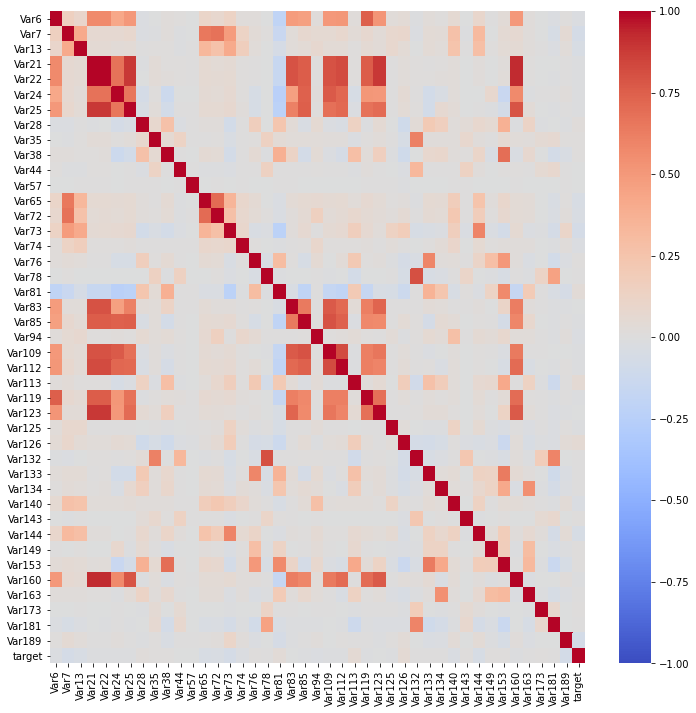

In [539]:
plt.figure(figsize=(12,12))
sns.heatmap(df_cleaned.corr(), vmin=-1, vmax=1, cmap='coolwarm')

Let's extract out the columns that have < 40000 entries and see which columns they are most highly correlated with.

In [503]:
missing_data_cols_4000 = df_cleaned[numerical_cols[df_cleaned[numerical_cols].count() < 40000]].columns
missing_data_cols_4000

Index(['Var72', 'Var94', 'Var126', 'Var189'], dtype='object')

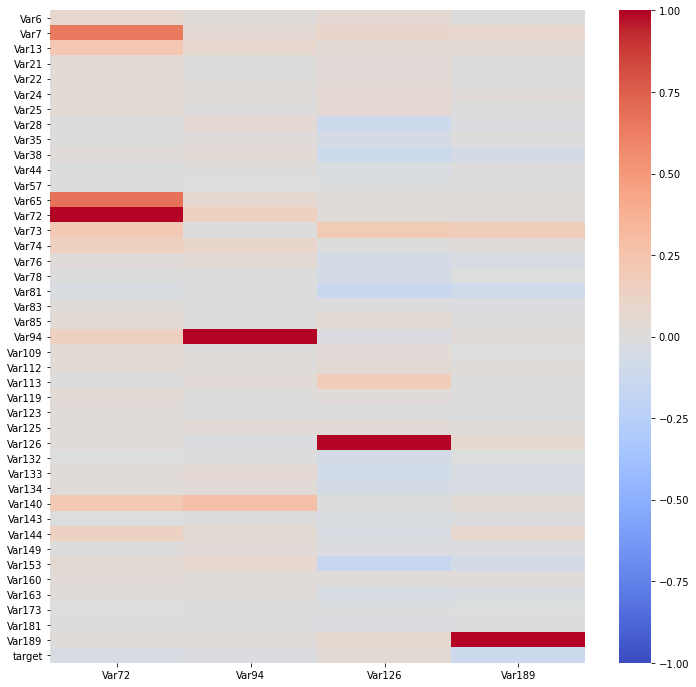

In [504]:
plt.figure(figsize=(12,12))
sns.heatmap(df_cleaned.corr()[missing_data_cols_4000],  vmin=-1, vmax=1, cmap='coolwarm')

To get the columns that each of these columns with missing values is most closely correlated with, Ill define a function that extracts out columns if the correlation value > 0.5

In [505]:
def get_correlated_columns(df_correlation, all_columns, missing_data_cols, threshold, col):

    return all_columns[df_correlation[missing_data_cols][col] > threshold].drop(col).values

In [506]:
df_correlation = df_cleaned.drop('target', axis=1)[numerical_cols].corr()

So there is actually only 1 column with < 4000 entries and that has a correlation of > 0.5 with another column. For this column let's use regression imputation

In [507]:
for col in missing_data_cols_4000:
    print(get_correlated_columns(df_correlation, numerical_cols, missing_data_cols_4000, 0.5, col))

['Var7' 'Var65']
[]
[]
[]


### Regression Imputation for 'Var72'

In [508]:
x_cols = get_correlated_columns(df_correlation, numerical_cols, missing_data_cols_4000, 0.5, missing_data_cols_4000[0])

In [509]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression(fit_intercept=True)

In [510]:
regression_df = df_cleaned[[x_cols[0], x_cols[1], missing_data_cols_4000[0]]]
regression_df.dropna(axis=0, inplace=True, )
regression_df.head()

/Users/shane/anaconda3/envs/cust_churn/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Var7,Var65,Var72
1,0.0,9.0,3.0
4,7.0,18.0,3.0
8,7.0,27.0,3.0
9,7.0,18.0,3.0
11,14.0,27.0,6.0


In [511]:
model.fit(regression_df[x_cols], regression_df[missing_data_cols_4000[0]])
model.coef_

array([0.11353255, 0.09041167])

In [512]:
# Get the entries where 'Var72' is NaN and drop entries where either 'Var7' or 'Var65' is NaN
X_values = df_cleaned[np.isnan(df_cleaned['Var72'])][x_cols]
X_values = X_values.dropna(axis=0)
X_values

,Var7,Var65
0,7.0,9.0
2,7.0,9.0
3,0.0,9.0
5,7.0,9.0
6,7.0,9.0
...,...,...
49978,7.0,9.0
49979,0.0,9.0
49985,0.0,9.0
49987,7.0,36.0


In [513]:
# We now have 17000 values to imputate for 'Var72'
predicted = pd.DataFrame(model.predict(X_values), index=X_values.index, columns=['Var72'])
index = predicted.index
predicted

,Var72
0,3.332804
2,3.332804
3,2.538076
5,3.332804
6,3.332804
...,...
49978,3.332804
49979,2.538076
49985,2.538076
49987,5.773919


In [514]:
test_df = df_cleaned.copy()

In [515]:
# Overwrite ensures if keys overlap the original value is not overwritten.
df_cleaned.update(other=predicted, overwrite=False)

Okay, so now we have only ~ 5000 missing values for 'Var72'

In [516]:
df_cleaned['Var72'].count()

44461

### Mean/Median/Mode Imputation
Now for the rest of the data that is missing in 'Var72', 'Var94', 'Var126', and 'Var189' since they do not correlate strongly with other columns (or for the left over missing in 'Var72' the correlated columns are missing values for that entry) we should now check the distribution of values to see which kind of imputation is most appropriate.

For all but 'Var94', even though they are numerical columns the data seems to be quite discretised. In these cases the mode, or median is probably going to be most applicable. But first let's check if they are normally distributed

In [517]:
for col in missing_data_cols_4000:
    print("There is {} unique values for {}".format(df_cleaned[col].dropna(axis=0).nunique(), col))

There is 39 unique values for Var72
There is 20002 unique values for Var94
There is 51 unique values for Var126
There is 97 unique values for Var189


In [518]:
df_cleaned[missing_data_cols_4000].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Var72,44461.0,3.841792,1.947451,2.538076,3.00,3.0,3.332804,24.0
Var94,27620.0,98671.065858,180633.296795,0.000000,8630.25,41091.0,117353.250000,5640330.0
Var126,36080.0,-0.553880,22.532095,-32.000000,-20.00,4.0,10.000000,68.0
Var189,21022.0,270.142137,86.707692,6.000000,204.00,270.0,330.000000,642.0


As you can see from the plot below 'Var72' is not normally distributed, and so mean would be a bad choice for an imputation scheme. More appropriate would be the median or mode as they are more representative of a typical sample value for 'Var72'.

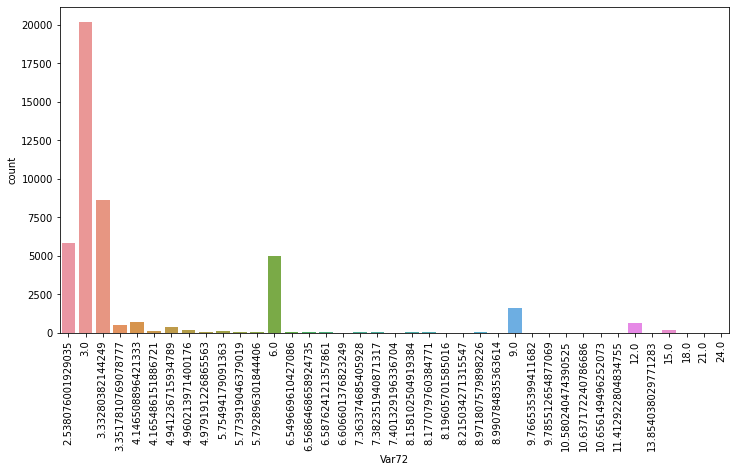

In [519]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(df_cleaned[missing_data_cols_4000[0]].dropna(axis=0))


 For this column the median and mode are the same so let's impute that value

In [533]:
print('The mean of Var72 is {}'.format(np.mean(df_cleaned[missing_data_cols_4000[0]].dropna(axis=0))))
print('The median of Var72 is {}'.format(np.median(df_cleaned[missing_data_cols_4000[0]].dropna(axis=0))))
value, count = np.unique(df_cleaned[missing_data_cols_4000[0]], return_counts=True)
print('The mode of Var72 is {}'.format(value[np.argmax(count)]))
print('The standard devation of Var72 is {}'.format(np.std(df_cleaned[missing_data_cols_4000[0]].dropna(axis=0))))

The mean of Var72 is 3.748538425648097
The median of Var72 is 3.0
The mode of Var72 is 3.0
The standard devation of Var72 is 1.8553038798109882


In [526]:
median = 3
df_cleaned['Var72'].fillna(value=3, inplace=True)
df_cleaned['Var72'].describe()

count    50000.000000
mean         3.748538
std          1.855322
min          2.538076
25%          3.000000
50%          3.000000
75%          3.332804
max         24.000000
Name: Var72, dtype: float64

Now look at the distribution for 'Var126'. This is more evenly distributed than 'Var72' but it is certainly not Gaussian. Furthermore, as can be seen in the boxplot there are quite a few outliers that will bring the mean up. The clear spike at a value of 4 shows that the vast majority of samples of 'Var126' have this value so using this as our imputation value seems appropriate

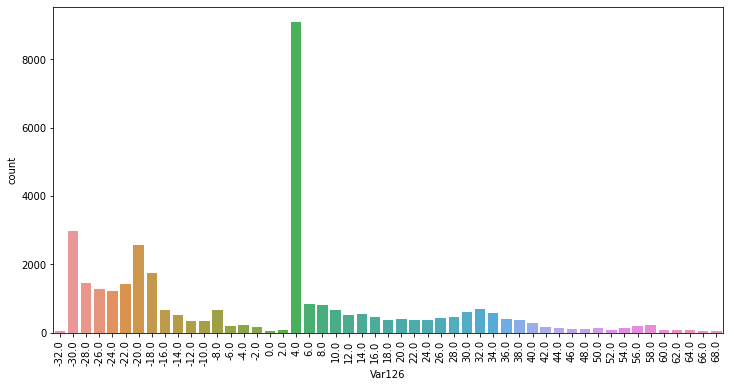

In [522]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(df_cleaned[missing_data_cols_4000[2]].dropna(axis=0))

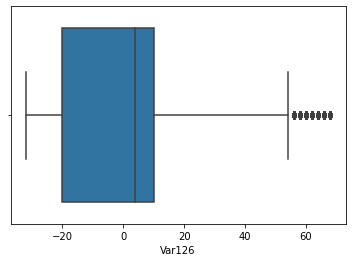

In [523]:
sns.boxplot(df_cleaned[missing_data_cols_4000[2]].dropna(axis=0))

In [524]:
median = 3
df_cleaned['Var126'].fillna(value=4, inplace=True)
df_cleaned['Var126'].describe()

count    50000.00000
mean         0.71392
std         19.24880
min        -32.00000
25%        -18.00000
50%          4.00000
75%          4.00000
max         68.00000
Name: Var126, dtype: float64

Let's now look at 'Var189'. This column looks to be close to being Gaussian distributed so using the mean value is appropriate here. This Gaussian shape is confirmed by the symmetric boxplot although it does show some outliers, particularly at the top end of the distribution.

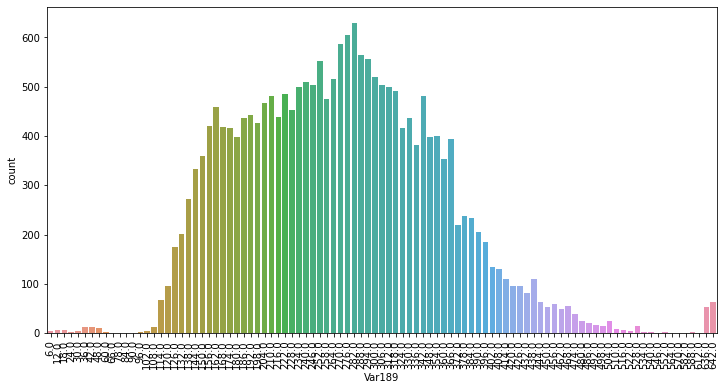

In [528]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(df_cleaned[missing_data_cols_4000[-1]].dropna(axis=0))

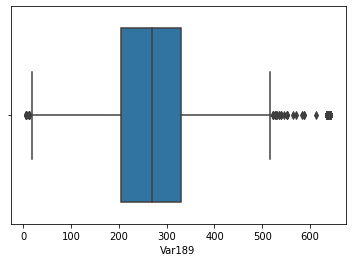

In [530]:
sns.boxplot(df_cleaned[missing_data_cols_4000[-1]].dropna(axis=0))

The median and mean are the same but the mode is higher. Since this distribution is close to Normal I will use the mean value to impute

In [532]:
print('The mean of Var72 is {}'.format(np.mean(df_cleaned[missing_data_cols_4000[-1]].dropna(axis=0))))
print('The median of Var72 is {}'.format(np.median(df_cleaned[missing_data_cols_4000[-1]].dropna(axis=0))))
value, count = np.unique(df_cleaned[missing_data_cols_4000[-1]], return_counts=True)
print('The mode of Var72 is {}'.format(value[np.argmax(count)]))

The mean of Var72 is 270.1421368090572
The median of Var72 is 270.0
The mode of Var72 is 282.0
The standard deviation of Var72 is 86.70562958566403


In [536]:
mean = 270
df_cleaned['Var189'].fillna(value=mean, inplace=True)
df_cleaned['Var189'].describe()

count    50000.000000
mean       270.059760
std         56.221702
min          6.000000
25%        270.000000
50%        270.000000
75%        270.000000
max        642.000000
Name: Var189, dtype: float64

Okay, now let's deal with colum 'Var92' which is continuous.

From both plots below it is clear the data possesses a huge amount of skew towards the low end of the spectrum. Using the mean would not be appropriate here as the massive tail would drag the mean up.

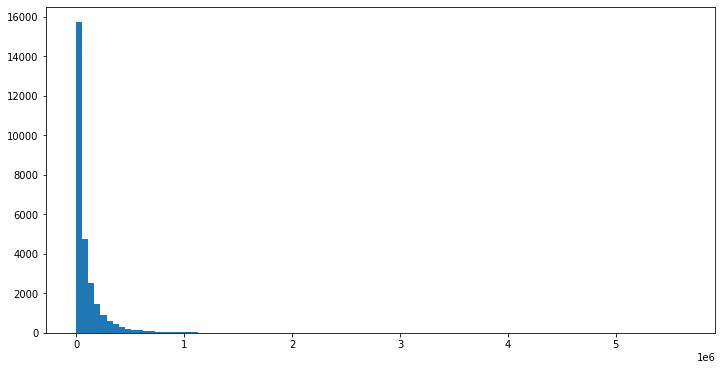

In [550]:
plt.figure(figsize=(12,6))
plt.hist(df_cleaned[missing_data_cols_4000[1]].dropna(axis=0), bins=100)
plt.show()

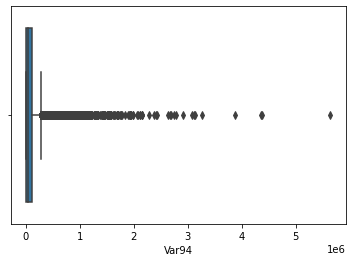

In [552]:
sns.boxplot(df_cleaned[missing_data_cols_4000[1]].dropna(axis=0))

As expected the mean is not representative of a typical value for this column and neither is median for the same reason. Mode is the clear choice here so let's impute that into the dataset

In [554]:
print('The mean of Var72 is {}'.format(np.mean(df_cleaned[missing_data_cols_4000[1]].dropna(axis=0))))
print('The median of Var72 is {}'.format(np.median(df_cleaned[missing_data_cols_4000[1]].dropna(axis=0))))
value, count = np.unique(df_cleaned[missing_data_cols_4000[1]], return_counts=True)
print('The mode of Var72 is {}'.format(value[np.argmax(count)]))

The mean of Var72 is 98671.06585807385
The median of Var72 is 41091.0
The mode of Var72 is 0.0


In [556]:
mode = 0
df_cleaned['Var94'].fillna(value=mode, inplace=True)
df_cleaned['Var94'].describe()

count    5.000000e+04
mean     5.450590e+04
std      1.429368e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.071000e+03
75%      5.114100e+04
max      5.640330e+06
Name: Var94, dtype: float64

Now we have a good amount of data that is filled in but there is still a lot of columns with only 45000 entries.

It is perculiar that so many of them have either 44471, 44461, or 44991 entries that are not null. There may be many rows where all the entries are missing so let's check this.

In [559]:
df_cleaned.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Var6,44471.0,1.326437e+03,2.685694e+03,0.000000e+00,5.180000e+02,8.610000e+02,1.428000e+03,131761.00
Var7,44461.0,6.809496e+00,6.326053e+00,0.000000e+00,0.000000e+00,7.000000e+00,7.000000e+00,140.00
Var13,44461.0,1.249688e+03,2.794955e+03,0.000000e+00,0.000000e+00,2.320000e+02,1.604000e+03,197872.00
Var21,44471.0,2.345182e+02,5.655601e+02,0.000000e+00,1.120000e+02,1.440000e+02,2.280000e+02,36272.00
Var22,44991.0,2.902454e+02,7.044900e+02,0.000000e+00,1.350000e+02,1.800000e+02,2.850000e+02,45340.00
Var24,42770.0,4.507926e+00,9.928819e+00,0.000000e+00,0.000000e+00,2.000000e+00,6.000000e+00,494.00
Var25,44991.0,9.682701e+01,2.143183e+02,0.000000e+00,1.600000e+01,4.800000e+01,1.120000e+02,13168.00
Var28,44989.0,2.245077e+02,9.852024e+01,-6.688000e+01,1.665600e+02,2.200800e+02,2.664000e+02,5158.56
Var35,44991.0,7.168100e-01,2.996007e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,110.00
Var38,44991.0,2.579107e+06,3.010076e+06,0.000000e+00,7.794000e+03,1.290246e+06,4.570944e+06,18846900.00


It indeed looks as though the null values are very highly correlated, such that if there is a null value in one column that the majority of the other columns are likely to be null. With 50,000 datapoints and around 5,000 null rows, dropping all of these only loses us 10% of the data which we should be able to deal with.

Trying to impute values for all the columns is almost certainly going to add noise to the data.

from the plot it seems 'Var65' is a good indicator of these null rows so let's use it to delete all the sparsely populated rows

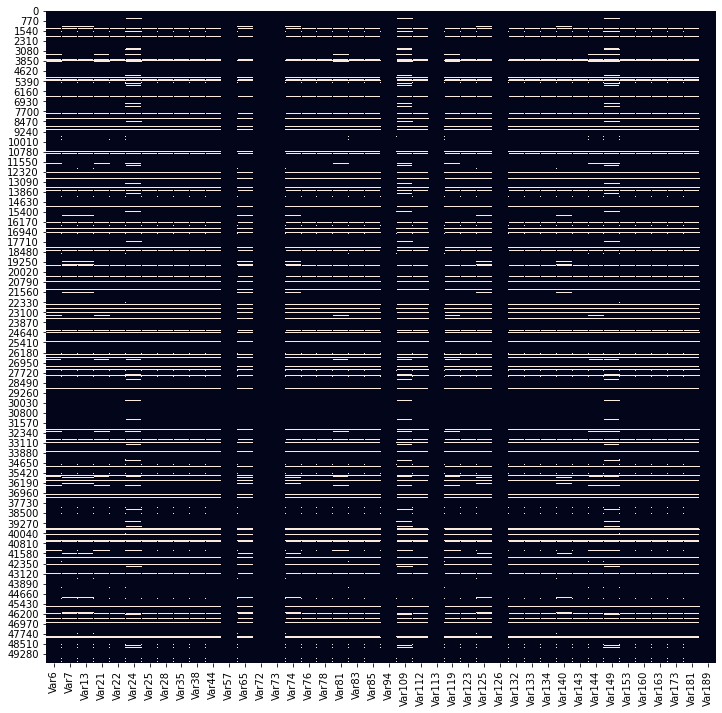

In [574]:
plt.figure(figsize=(12,12))
sns.heatmap(df_cleaned[numerical_cols].isnull(), cbar=False)

That is looking a lot better. We have removed all the sparsely populated entries and are still left with > 44,000 datapoints.

Now we only have a few columns to deal with

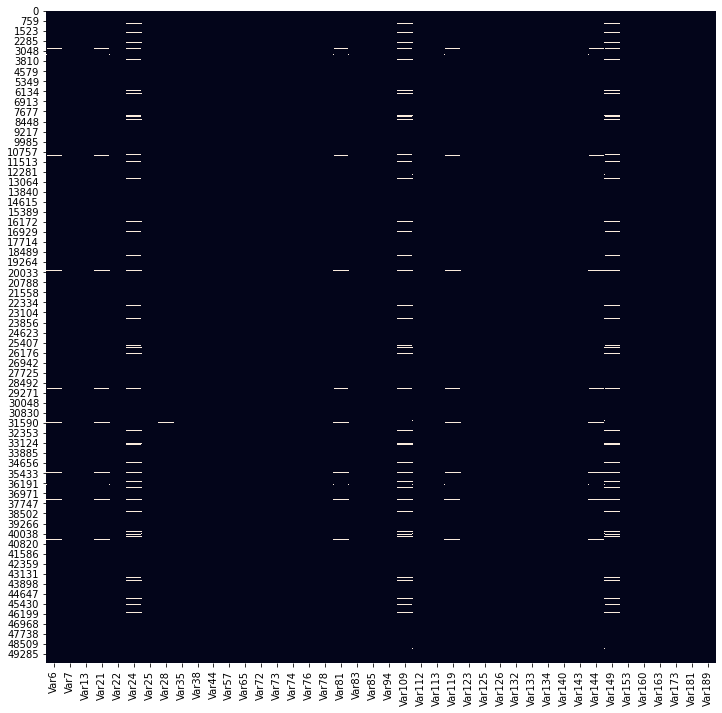

In [591]:
null_indices = df_cleaned[np.isnan(df_cleaned['Var65'])].index
df_cleaned.drop(null_indices, inplace=True, errors='ignore')

plt.figure(figsize=(12,12))
sns.heatmap(df_cleaned[numerical_cols].isnull(), cbar=False)

In [592]:
len(df_cleaned)

44461